In [2]:
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(7)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%load_ext autoreload
%autoreload 2


In [3]:
REPO_DIR= os.path.join(os.environ['HOME'],
                       'myrepo/obiwan')
DATA_DIR= os.path.join(os.environ['HOME'],
                       'mydata')

In [4]:
from astrometry.util.fits import fits_table, merge_tables
from obiwan.common import fits2pandas

In [14]:
ccds= fits_table(os.path.join(DATA_DIR,
                 '1741p242','dr5/legacysurvey-1741p242-ccds.fits'))
df=fits2pandas(ccds)
df['seeing']=df['fwhm']*0.262
(df.loc[np.argsort(df['ccdnmatch'])[::-1],
       ['expnum','ccdname','seeing','ccdnmatch','image_filename']]
   .to_csv('df.csv'))
!head df.csv

,expnum,ccdname,seeing,ccdnmatch,image_filename
12,511967,S17,0.889886796474,47,decam/DECam_CP/CP20160107/c4d_160116_084245_oki_z_v1.fits.fz     
14,432018,S17,1.10720980167,47,decam/DECam_CP/CP20150407/c4d_150412_031122_ooi_g_v1.fits.fz     
13,432019,S17,0.90438747406,44,decam/DECam_CP/CP20150407/c4d_150412_031257_ooi_r_v1.fits.fz     
18,425662,S16,1.23162901402,43,decam/DECam_CP/CP20150326/c4d_150329_031648_ooi_z_v1.fits.fz     
1,432018,S5 ,1.08038723469,43,decam/DECam_CP/CP20150407/c4d_150412_031122_ooi_g_v1.fits.fz     
9,630980,S16,0.835699975491,43,decam/DECam_CP/CP20170316/c4d_170317_044025_oki_z_v1.fits.fz     
25,630980,S20,0.839677155018,43,decam/DECam_CP/CP20170316/c4d_170317_044025_oki_z_v1.fits.fz     
17,432018,S11,1.0755007267,42,decam/DECam_CP/CP20150407/c4d_150412_031122_ooi_g_v1.fits.fz     
15,511967,S11,0.874530553818,41,decam/DECam_CP/CP20160107/c4d_160116_084245_oki_z_v1.fits.fz     


In [5]:
import fitsio
hdu= fitsio.FITS(os.path.join(DATA_DIR,
                 '1741p242','ccds_decam',
                 'c4d_160116_084245_oki_z_v1_S17.fits'))
hdu


  file: /home/kaylan/mydata/1741p242/ccds_decam/c4d_160116_084245_oki_z_v1_S17.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      IMAGE_HDU       S17

In [6]:
img= hdu[1].read()

In [85]:
def plot_image(ax,image,q=None):
    if q is None:
        q=[0.5,99.5]
    vmin=np.percentile(image,q=q[0]);vmax=np.percentile(image,q=q[1])
    ax.imshow(image.T, interpolation='none', origin='lower',
              cmap='gray',vmin=vmin,vmax=vmax)
    ax.tick_params(direction='out')

def plot_xy(ax,xs=None,ys=None,
            color='y',r_pixels=3.5/0.262):
    """
    xs,ys: pixel positions, array like
    """
    from matplotlib.patches import Circle,Wedge
    from matplotlib.collections import PatchCollection
    dr= r_pixels/ 20
    # img transpose used, so reverse x,y
    #patches=[Wedge((x,y), r_pixels + dr, 0, 360,dr) 
    patches=[Wedge((y, x), r_pixels + dr, 0, 360,dr)
             for x,y in zip(xs, ys) ]
    coll = PatchCollection(patches, color=color) #,alpha=1)
    ax.add_collection(coll)

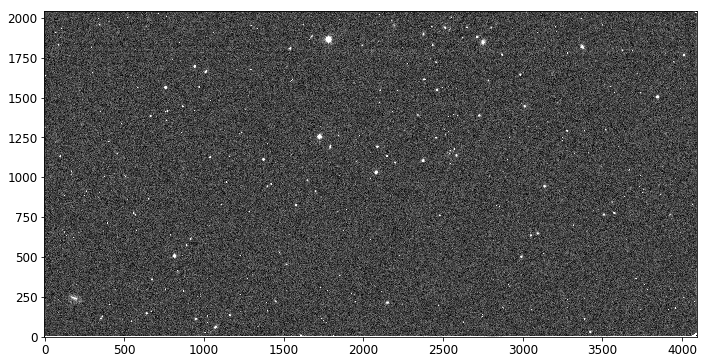

In [7]:
fix,ax=plt.subplots(figsize=(12,6))
plot_image(ax,img)

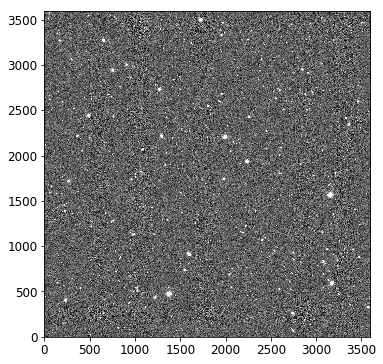

In [10]:
dr5_z= fitsio.FITS(os.path.join(DATA_DIR,
                 '1741p242','dr5',
                 'legacysurvey-1741p242-image-z.fits.fz'))[1].read()
fix,ax=plt.subplots(figsize=(12,6))
plot_image(ax,dr5_z)

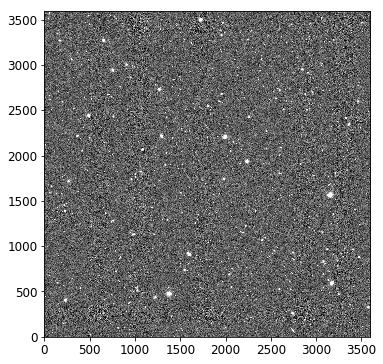

In [9]:
obi_z= fitsio.FITS(os.path.join(DATA_DIR,
                 '1741p242','rs0/coadd',
                 'legacysurvey-1741p242-image-z.fits.fz'))[1].read()
fix,ax=plt.subplots(figsize=(12,6))
plot_image(ax,obi_z)

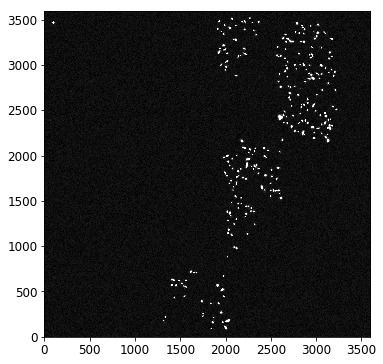

In [73]:
fix,ax=plt.subplots(figsize=(12,6))
diff= obi_z-dr5_z
plot_image(ax,diff)

In [96]:
simcat=fits_table(os.path.join(DATA_DIR,
                 '1741p242','rs0/obiwan',
                 'simcat-elg-1741p242.fits'))
skipid=fits_table(os.path.join(DATA_DIR,
                 '1741p242','rs0/obiwan',
                 'skippedids-elg-1741p242.fits'))

In [97]:
len(simcat),len(skipid)

(282, 18)

In [98]:
simcat.get_columns()

['id',
 'seed',
 'ra',
 'dec',
 'x',
 'y',
 'gflux',
 'rflux',
 'zflux',
 'sersicn',
 'rhalf',
 'ba',
 'phi']

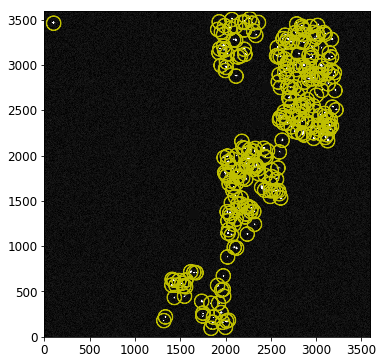

In [87]:
fix,ax=plt.subplots(figsize=(12,6))
plot_image(ax,diff)
plot_xy(ax,xs=simcat.x,ys=simcat.y,
        color='y',r_pixels=20/0.262)

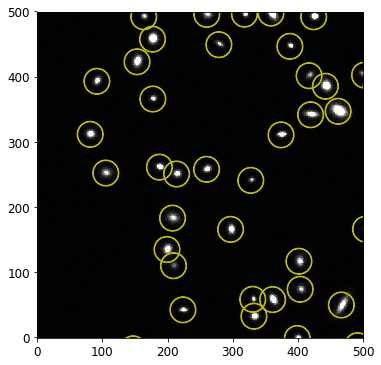

In [86]:
fix,ax=plt.subplots(figsize=(12,6))
diff= obi_z-dr5_z
xslc,yslc= slice(2500,3000), slice(2500,3000)
plot_image(ax,diff[xslc,yslc])
plot_xy(ax,xs=simcat.x-xslc.start,ys=simcat.y-yslc.start,
        color='y',r_pixels=5/0.262)

(-0.01, 0.01)

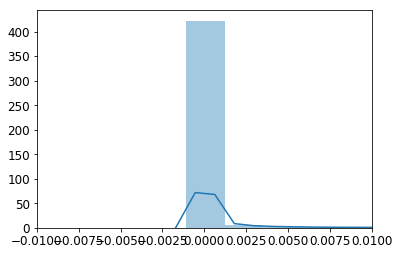

In [89]:
sns.distplot(diff[xslc,yslc].flatten()) #,s=np.linspace(-0.01,0.01,num=100))
plt.xlim(-0.01,0.01)

In [93]:
tractor= simcat=fits_table(os.path.join(DATA_DIR,
                 '1741p242','rs0/tractor',
                 'tractor-1741p242.fits'))

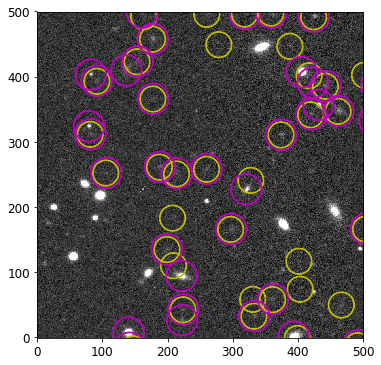

In [123]:
fix,ax=plt.subplots(figsize=(12,6))
plot_image(ax,obi_z[xslc,yslc])
# NOTE: x pixel - y slice start IS correct
plot_xy(ax,xs=simcat.x-yslc.start,ys=simcat.y-xslc.start,
        color='y',r_pixels=5/0.262)
plot_xy(ax,xs=tractor.bx-yslc.start,ys=tractor.by-xslc.start,
        color='m',r_pixels=6/0.262)

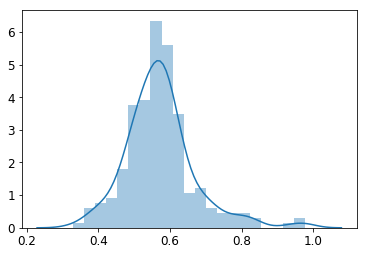

In [113]:
def not_index(indices,n):
    keep=np.ones(n,bool)
    keep[indices]=False
    return np.arange(n)[keep]

from astrometry.libkd.spherematch import match_radec
isim,itrac,d= match_radec(simcat.ra, simcat.dec, tractor.ra, tractor.dec,          
                          1./3600.0,nearest=True)
not_isim= not_index(isim,len(simcat))
not_itrac= not_index(itrac,len(tractor))
sns.distplot(d*3600)

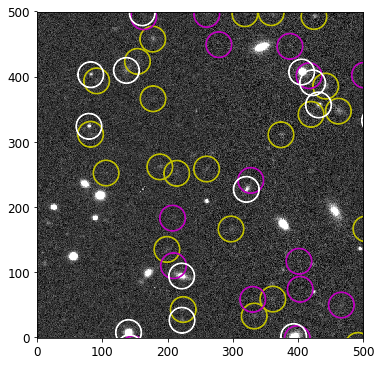

In [122]:
xslc,yslc= slice(2500,3000), slice(2500,3000)

fix,ax=plt.subplots(figsize=(12,6))
plot_image(ax,obi_z[xslc,yslc])
# Recovered
plot_xy(ax,xs=tractor.bx[itrac]-yslc.start,ys=tractor.by[itrac]-xslc.start,
        color='y',r_pixels=5/0.262)
# Missed 
plot_xy(ax,xs=simcat.x[not_isim]-yslc.start,ys=simcat.y[not_isim]-xslc.start,
        color='m',r_pixels=5/0.262)
# Real
plot_xy(ax,xs=tractor.bx[not_itrac]-yslc.start,ys=tractor.by[not_itrac]-xslc.start,
        color='w',r_pixels=5/0.262)

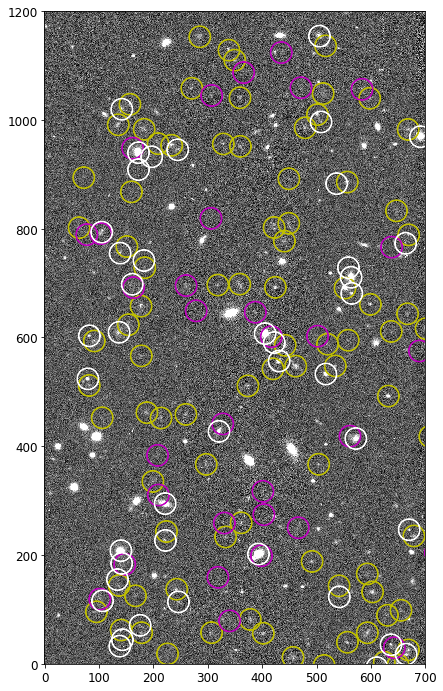

In [120]:
xslc,yslc= slice(2500,3200),slice(2300,3500) 
fig,ax=plt.subplots(figsize=(8,12))

plot_image(ax,obi_z[xslc,yslc])
# Recovered
plot_xy(ax,xs=tractor.bx[itrac]-yslc.start,ys=tractor.by[itrac]-xslc.start,
        color='y',r_pixels=5/0.262)
# Missed 
plot_xy(ax,xs=simcat.x[not_isim]-yslc.start,ys=simcat.y[not_isim]-xslc.start,
        color='m',r_pixels=5/0.262)
# Real
plot_xy(ax,xs=tractor.bx[not_itrac]-yslc.start,ys=tractor.by[not_itrac]-xslc.start,
        color='w',r_pixels=5/0.262)

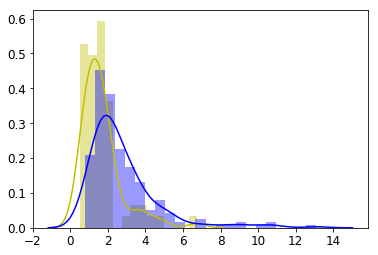

In [131]:
sns.distplot(simcat.zflux[isim],color='y')
sns.distplot(simcat.zflux[not_isim],color='m')

(-200, 200)

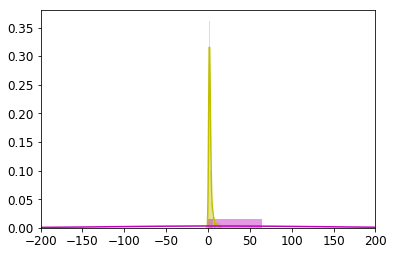

In [134]:
sns.distplot(tractor.flux_z[itrac],color='y')
sns.distplot(tractor.flux_z[not_itrac],color='m')
plt.xlim(-200,200)

In [ ]:
sns.distplot(simcat.flux_z[not_itrac],color='b',hist=False)
sns.distplot(tractor.flux_z[itrac],color='y',hist=False)